# K-Nearest Neighbors (KNN)  

- identify the new data point within your set 
- Find the k nearest points from your data set
- count the number of datapoints in each category (2 blue, 1 red, 1 green within circle)
- select the highest frequenting feature and that is your data points feature. (most likely blue) 

## What should I pick for the value of k?  
- How large hsould my margin be?
- Odd - avoid ties   (also not a multiple of the number of categories you have lol)
- k = sqrt(n)
- make k the nearest odd integer to square root of n      


## How to measure distance  
- Manhattan distance (l-1 norm)
- *Euclidian distance (l2 norm)* (default for more programs)
- l-norm
- l-inf norm (longest component)
- cosine distance
- jaccard distance


# Random Dataset


In [75]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
from sklearn.datasets import make_gaussian_quantiles


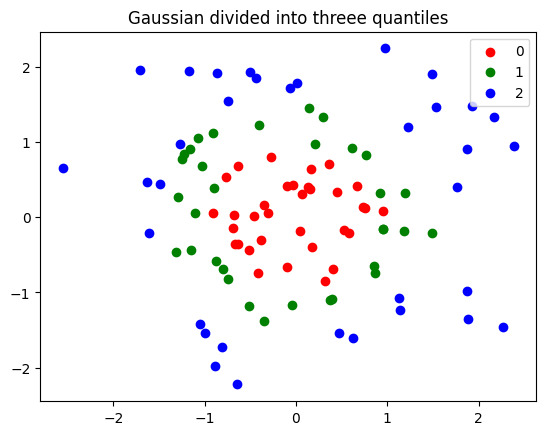

In [77]:
X, y = make_gaussian_quantiles(n_features=2, n_classes=3, random_state=0) # two dimmensional, three different groups, random state

for grp,color in zip([0, 1, 2], ['red', 'green', 'blue']):
    X_grp = X[y==grp]
    plt.scatter(X_grp[:, 0], X_grp[:,1], c=color, label=grp)
    
plt.title("Gaussian divided into threee quantiles")
plt.legend()
plt.show()

In [78]:
print(X[:10])
print(y[:10])
print("lengt of datapoints", len(X)) # k is square root of 100, so maybe 10... but then it's odd so maybe do 11

[[-0.09845252 -0.66347829]
 [ 1.8831507  -1.34775906]
 [-0.90729836  0.0519454 ]
 [ 1.92294203  1.48051479]
 [-1.17312341  1.94362119]
 [ 0.1666735   0.63503144]
 [ 0.94942081  0.08755124]
 [ 1.12663592 -1.07993151]
 [-0.74475482 -0.82643854]
 [-0.67246045 -0.35955316]]
[0 2 0 2 2 0 0 2 1 0]
lengt of datapoints 100


# Create the Model

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
k = 11
kNN = KNeighborsClassifier(n_neighbors=k, p=3, metric='euclidean')

# train the data
kNN.fit(X, y)
x_test = np.array([[-0.5, 1.7],
                   [1.1, 1.3],
                   [1.3, -0.7],
                   [-2, -1.3],
                   [-.5, .3]])



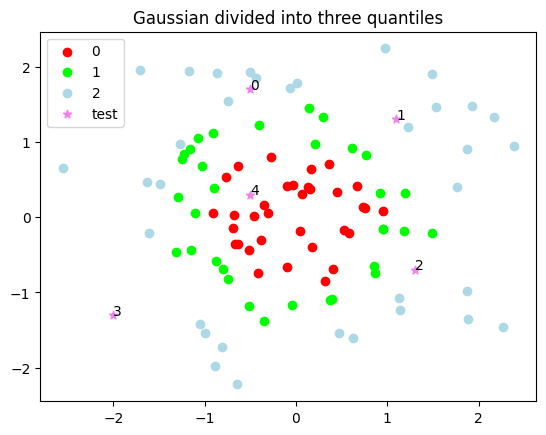

In [81]:
for grp,color in zip([0, 1, 2], ['red', 'lime', 'lightblue']):
    X_grp = X[y==grp]
    plt.scatter(X_grp[:, 0], X_grp[:,1], c=color, label=grp)
    
plt.scatter(x_test[:,0], x_test[:,1], c='violet', marker='*', label='test')
for i in range(5):
    plt.annotate(i, (x_test[i,0], x_test[i,1]))
plt.title("Gaussian divided into three quantiles")
plt.legend()
plt.show()

In [82]:
# run points through model

y_test = kNN.predict(x_test)
for i in range(5):
    print("point ", i, print(y_test[i]))
    
print(y_test)

2
point  0 None
2
point  1 None
1
point  2 None
1
point  3 None
0
point  4 None
[2 2 1 1 0]


# Using kNN as a regression model  

For some input point x, the model will predict y_hat to be the average y value for the nearest k points.

$$ \hat{y} = \frac{1}{k}\sum_{j=1}^k y_j$$

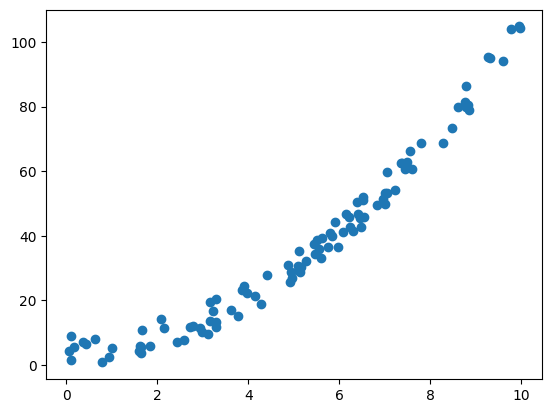

In [83]:
X = np.random.rand(100, 2) * 10 # 100 by two array

x = X[:,0]
y = X[:,1] + x**2

plt.scatter(x, y)


In [84]:
print(x) # x is not an array of arrays yet...

print(x.reshape(-1, 1)) # each point is an individual array


[2.14894099 7.23146919 6.20403823 4.14642361 5.9630375  4.27154393
 8.82490042 9.95179576 5.62225149 0.17176232 9.96402553 0.63906656
 6.38755214 7.60794421 5.27253876 5.10171902 8.48952503 3.97396167
 1.6124646  5.89853114 7.06035899 1.63418763 9.31846046 4.94363296
 5.55224501 2.93421706 1.0127156  8.77734063 5.7551552  2.43660686
 6.30108108 6.51833031 3.10401867 8.85849058 8.60917396 5.47051001
 5.83822171 6.08243877 6.40676551 5.78532198 0.94548707 7.45182703
 4.87784536 3.62069097 2.77778336 6.95611121 5.14203981 1.64135824
 5.60846797 2.57676422 8.77551799 3.76544884 7.35237806 5.16731008
 9.60975449 9.25943591 3.22748232 6.14560246 3.86257502 7.48612904
 2.98454032 0.43950987 6.45830124 0.77490961 1.66721232 1.58824979
 8.27478523 3.90583589 8.77931155 6.82699076 3.2939519  3.16304304
 5.10408275 6.48271297 7.01606153 7.37363808 2.72245627 6.22616249
 3.28069392 0.10398679 6.53112059 1.83477489 0.09191695 7.54978197
 9.77654778 0.37133002 6.53719974 4.95058027 7.80302265 7.0133

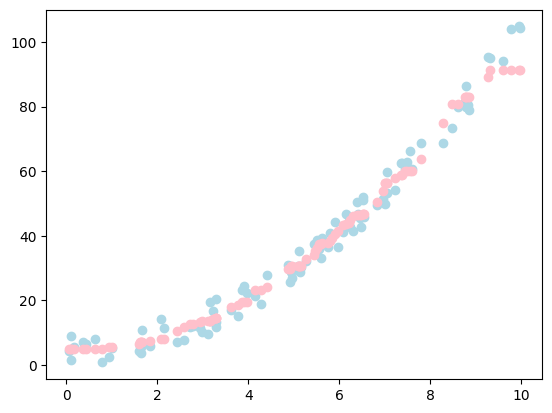

In [86]:
from sklearn.neighbors import KNeighborsRegressor

k = 11

kNR = KNeighborsRegressor(n_neighbors=k, p=2, metric='euclidean') # p=2 means euclidean distance
kNR.fit(x.reshape(-1, 1), y)

plt.scatter(x, y, c='lightblue')

y_pred = kNR.predict(x.reshape(-1, 1))
plt.scatter(x=x, y=y_pred, c="pink")

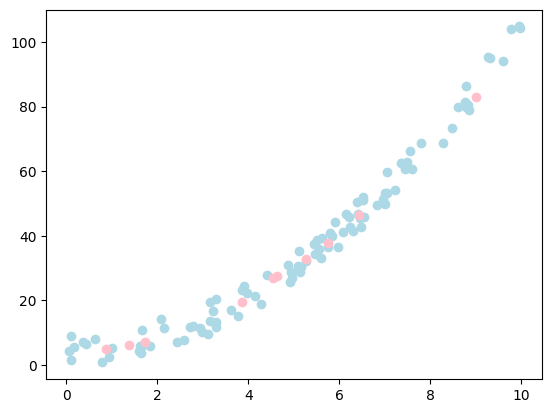

In [89]:
x_test = np.random.random(10) * 10 # make some test data
y_test = kNR.predict(x_test.reshape(-1, 1))

plt.scatter(x,y,c="lightblue")
plt.scatter(x_test, y_test, c="pink")